<center>

**МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РОССИЙСКОЙ ФЕДЕРАЦИИ**

Федеральное государственное автономное образовательное учреждение  
высшего профессионального образования  
**«Дальневосточный федеральный университет»**  
*(ДВФУ)*  

---
<br><br>

**Лабораторная работа №1**  
по дисциплине *«Методы оптимизации»*  
Направление подготовки **01.03.02 Прикладная математика и информатика**  
Очной формы обучения  

на тему  

### «Реализация методов половинного 
### деления и Золотого сечения»

</center>


<br><br>


<div style="text-align: left; margin-left: 50%;">

Студентка группы **Б9123-01.03.02сп**  
Бобышева Ю.В. ______________________ (подпись)  

Преподаватель  
______________________ /Неверова Г.П./  

</div>

<br><br><br><br>

<center>


Владивосток  
**2025 г.**

</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.precision', 15) 

## Цель работы:
 Реализовать методы половинного деления и золотого сечения для поиска минимального значения функции на отрезке. Ислледовать эти методы.

## Метод половинного деления

Метод половинного деления (метод дихотомии) используется для нахождения минимума (или максимума) функции одной переменной на заданном отрезке \([a, b]\).

### Условия применения
Функция $f(x)$ должна быть:
- непрерывной на отрезке \([a, b]\);
- иметь единственный экстремум (минимум или максимум) на этом интервале.

Задаются параметры:
- $\varepsilon > 0$ — требуемая точность;
- $\delta$, где $0 < \delta \le \frac{\varepsilon}{2}$.

### Алгоритм
1. Задать начальные значения $a_1 = a$, $b_1 = b$, $k = 1$.
2. Проверить условие окончания:
   $$b_k - a_k < \varepsilon$$
   Если выполняется, вычислить:
   $$x^* = \frac{a_k + b_k}{2}, \quad f(x^*) = f\left( \frac{a_k + b_k}{2} \right)$$
   и завершить вычисления.
3. Вычислить точки:
   $$\alpha_k = \frac{a_k + b_k}{2} - \delta, \quad \beta_k = \frac{a_k + b_k}{2} + \delta$$
4. Сравнить значения функции:
   - если $f(\alpha_k) < f(\beta_k)$, то
     $$a_{k+1} = a_k, \quad b_{k+1} = \beta_k;$$
   - иначе
     $$a_{k+1} = \alpha_k, \quad b_{k+1} = b_k.$$
5. Увеличить номер итерации:
   $$k = k + 1$$
   и перейти к пункту 2.

### Критерий остановки
Процесс повторяется, пока длина интервала $[a_k, b_k]$ не станет меньше заданной точности $\varepsilon$.

### Результат
В качестве приближённого значения минимума принимается:
$$x^* = \frac{a_k + b_k}{2}, \quad f(x^*) = f\left( \frac{a_k + b_k}{2} \right)$$


In [96]:
def bisection_method(f : callable, a : float, b: float, show_annotation : bool = False, eps : float = 0.002) -> tuple[float, float, float]:
    
    delta = eps / 4
    
    if b < a:
        a, b = b, a
    
    k = 0
    intervals = [[a, b]]
        
    while b - a >= eps:
        alpha = (b + a) / 2 - delta
        beta = (b + a) / 2 + delta
        
        if f(alpha) < f(beta):
            b = beta
        else:
            a = alpha
        
        k += 1 
        intervals.append([float(a), float(b)])
        # if show_annotation:
        #     print(k, [a, b], b - a)
        
    x = (a + b) / 2
    
    if show_annotation:
        df = pd.DataFrame(intervals, columns=["a", "b"])
        df["length"] = df["b"] - df["a"]
        
        print(df)
        
        print("Приближенное решение (x, f(x)): ", float(x), float(f(x)))
        
        plt.plot(range(len(intervals) - 1), [(intervals[i + 1][1] - intervals[i + 1][0]) / (intervals[i][1] - intervals[i][0])  for i in range(len(intervals) - 1)], color="red")
        
        plt.title("Cоотношение длины интервала на k +1 итерации к длине интервала на k итерации")
        plt.xlabel("Номер итерации")
        plt.ylabel("Значение")
        plt.grid(True)
        plt.show()
    
    return float(x), float(f(x)), k

### Метод золотого сечения

**Начало**

Выбрать функцию $f(x)$, начальный отрезок $[a_1, b_1]$, точность $\varepsilon > 0$,  
и параметр  
$$\lambda = \frac{\sqrt{5} - 1}{2}.$$

Вычислить:  
$$\alpha_1 = a_1 + (1 - \lambda)(b_1 - a_1), \quad
\beta_1 = a_1 + \lambda(b_1 - a_1).$$

Положить $k = 1$.

**Пока** $b_k - a_k \ge \varepsilon$:  

- Если $f(\alpha_k) \le f(\beta_k)$,  
  то  
  $$a_{k+1} = a_k, \quad
  b_{k+1} = \beta_k, \quad
  \beta_{k+1} = \alpha_k, \quad
  \alpha_{k+1} = a_{k+1} + (1 - \lambda)(b_{k+1} - a_{k+1});$$

- Иначе  
  $$a_{k+1} = \alpha_k, \quad
  b_{k+1} = b_k, \quad
  \alpha_{k+1} = \beta_k, \quad
  \beta_{k+1} = a_{k+1} + \lambda(b_{k+1} - a_{k+1});$$

- Увеличить $k = k + 1$.


### Результат:
$$x^* = \frac{a_k + b_k}{2}, \quad f(x^*) = f\!\left(\frac{a_k + b_k}{2}\right).$$



In [95]:
def golden_ratio_method(f : callable, a : float, b: float, show_annotation : bool = False, eps : float = 0.002) -> tuple[float, float, float]:
    
    lam = (np.sqrt(5) - 1) / 2
    
    if b < a:
        a, b = b, a
    
    intervals = [[a, b]]
    
    alpha = a + (1 - lam) * (b - a)
    beta = a + lam * (b - a)
    k = 0
        
    while b - a >= eps:
        if f(alpha) <= f(beta):
            a, b = a, beta
            beta = alpha
            alpha = a + (1 - lam) * (b - a)
        else:
            a, b = alpha, b
            alpha = beta
            beta = a + lam * (b - a)
        k += 1
        intervals.append([float(a), float(b)])
        # if show_annotation:
        #     print(k, [float(a), float(b)], b - a)
        
        
    x = (a + b) / 2
        
    if show_annotation:
        df = pd.DataFrame(intervals, columns=["a", "b"])
        df["length"] = df["b"] - df["a"]
        
        print(df)
        
        print("Приближенное решение (x, f(x)): ", float(x), float(f(x)))
        
        plt.plot(range(len(intervals) - 1), [(intervals[i + 1][1] - intervals[i + 1][0]) / (intervals[i][1] - intervals[i][0])  for i in range(len(intervals) - 1)], color="blue")
        
        plt.title("Cоотношение длины интервала на k +1 итерации к длине интервала на k итерации")
        plt.xlabel("Номер итерации")
        plt.ylabel("Значение")
        plt.grid(True)
        plt.show()
    
    return float(x), float(f(x)), k

                    a                  b             length
0   0.000000000000000  3.141592653589793  3.141592653589793
1   1.570296326794897  3.141592653589793  1.571296326794897
2   2.355444490192345  3.141592653589793  0.786148163397448
3   2.748018571891069  3.141592653589793  0.393574081698724
4   2.944305612740431  3.141592653589793  0.197287040849362
5   3.042449133165112  3.141592653589793  0.099143520424681
6   3.091520893377453  3.141592653589793  0.050071760212341
7   3.116056773483623  3.141592653589793  0.025535880106170
8   3.128324713536708  3.141592653589793  0.013267940053086
9   3.134458683563250  3.141592653589793  0.007133970026543
10  3.137525668576522  3.141592653589793  0.004066985013271
11  3.139059161083158  3.141592653589793  0.002533492506636
12  3.139825907336475  3.141592653589793  0.001766746253318
Приближенное решение (x, f(x)):  3.140709280463134 -0.9999996098259849


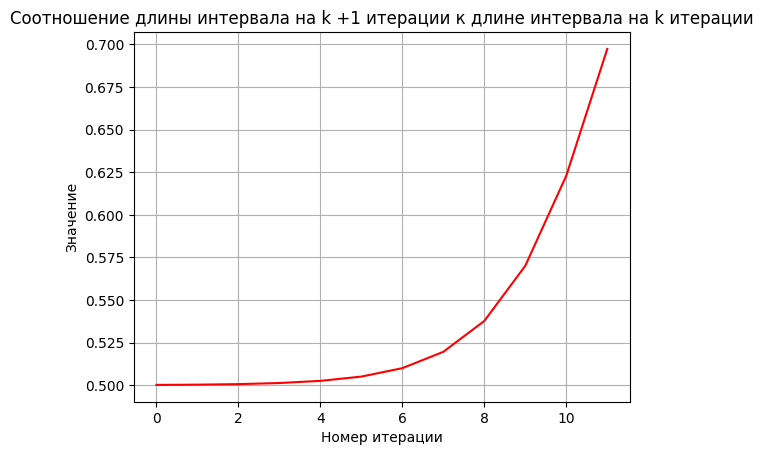

(3.140709280463134, -0.9999996098259849, 12)
                    a                  b             length
0   0.000000000000000  3.141592653589793  3.141592653589793
1   1.199981614864327  3.141592653589793  1.941611038725467
2   1.941611038725467  3.141592653589793  1.199981614864327
3   2.399963229728654  3.141592653589793  0.741629423861140
4   2.683240462586606  3.141592653589793  0.458352191003187
5   2.858315420731840  3.141592653589793  0.283277232857953
6   2.966517695444559  3.141592653589793  0.175074958145234
7   3.033390378877074  3.141592653589793  0.108202274712720
8   3.074719970157279  3.141592653589793  0.066872683432514
9   3.100263062309588  3.141592653589793  0.041329591280205
10  3.116049561437485  3.141592653589793  0.025543092152308
11  3.125806154461896  3.141592653589793  0.015786499127897
12  3.131836060565382  3.141592653589793  0.009756593024411
13  3.135562747486307  3.141592653589793  0.006029906103486
14  3.137865966668868  3.141592653589793  0.00372668692

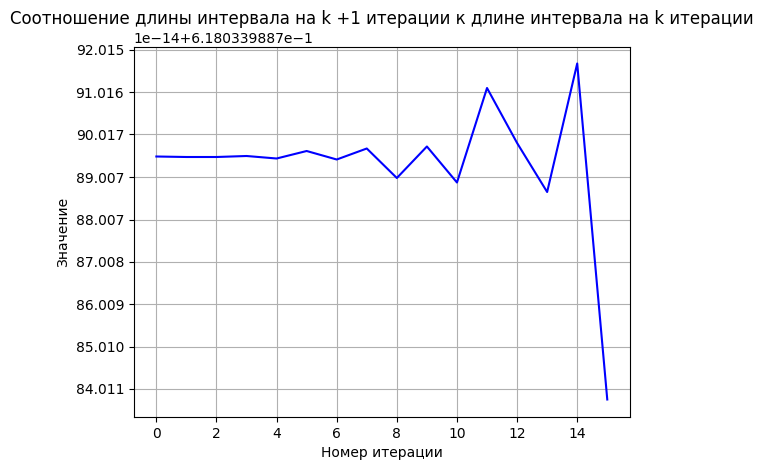

(3.1408809197206113, -0.9999997467174604, 16)


In [97]:
def f(x : float) -> float:
    return np.cos(x)

A, B = 0, np.pi

print(bisection_method(f, A, B, True))
print(golden_ratio_method(f, A, B, True))

<div style="font-size:20px;">

| Метод                     | Отрезок                                 | Число итераций |     x            |       f(x)           |
|----------------------------|-----------------------------------------|----------------|------------------|----------------------|
| Метод половинного деления  | [3.139825907336475, 3.141592653589793]  | 12             | 3.140709280463134 | -0.9999996098259849  |
| Метод золотого сечения  | [3.140169185851430 , 3.141592653589793]  | 16             | 3.1408809197206113 | -0.9999997467174604  |


<center>
Точное решение : $x = \pi$, $f(x) = -1$
</center>

</div>


### На основе таблиц и графиков можно сделать вывод, что оба метода довольно точно и быстро находят приближенное минимальное значение на заданном отрезке.

### Для одинаковой точности (0.002) методы показали разное количество итераций: методу золотого сечения понадобилось больше итераций, так как интервалы сужались с меньшей скоростью.

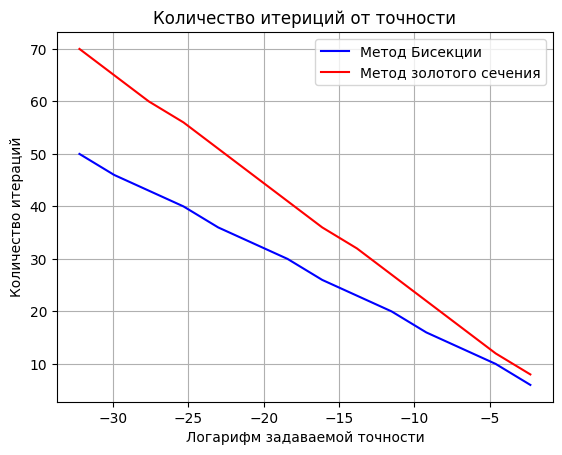

In [84]:
bisection_iterations = []
golden_ratio_iterations = []
for i in range(1, 15):
    eps = 0.1 ** i
    
    _, _1, b = bisection_method(f, A, B, False, eps)
    bisection_iterations.append(b)
    _, _2, g = golden_ratio_method(f, A, B, False, eps)
    golden_ratio_iterations.append(g)

plt.plot(np.log(0.1 ** np.arange(1, 15)), bisection_iterations, color="blue", label="Метод Бисекции")
plt.plot(np.log(0.1 ** np.arange(1, 15)), golden_ratio_iterations, color="red", label="Метод золотого сечения")
        
plt.title("Количество итериций от точности")
plt.xlabel("Логарифм задаваемой точности")
plt.ylabel("Количество итераций")
plt.legend()
plt.grid(True)
plt.show()

### Количество итераций у методов золотого сечения и бисекции растет с увеличением знаков после запятой у желаемой отчности ответа, растет оно линейно, и у метода золотого сечения это происходит заметно быстрее